In [98]:
import collections

count_uni = []
vocab_uni = []
vocab_index_count_lookup = {}
vocab_count_bi = collections.defaultdict(dict) # key: wi, value: {wi+1:count wi }]

f = open('hw4files/hw4_unigram.txt','r')
for line in f:
    count_uni.append(int(line.strip()))
                     
f.close()

                     
f = open('hw4files/hw4_vocab.txt','r')

for line in f:
    vocab_uni.append(line.strip())
f.close()
             

for i, item in enumerate(zip(vocab_uni, count_uni)):
    key = item[0]
    value = item[1]
    vocab_index_count_lookup[key] = (i, value)
                     
                     
f = open('hw4files/hw4_bigram.txt','r')
for line in f:
    lst = line.strip().split('\t')
    w_i_ind = int(lst[0])
    w_j_ind = int(lst[1])
    w_j_follow_w_i_count = int(lst[2])
    
    
    w_i = vocab_uni[w_i_ind-1]
    w_j = vocab_uni[w_j_ind-1]
    vocab_count_bi[w_i][w_j] = w_j_follow_w_i_count
f.close()



In [126]:
#4.3.a
from tabulate import tabulate
T = sum(count_uni)
rows =  [[vocab_index_count_lookup[key][0]+1, key, vocab_index_count_lookup[key][1]/T ] \
         for key in vocab_index_count_lookup if key[0].upper() == 'M']
rows.insert(0, ['Index in bigram', 'Word', 'P_u_W'])
print(tabulate(rows))



---------------  --------  ----------------------
Index in bigram  Word      P_u_W
54               MILLION   0.002072759168154815
69               MORE      0.0017088989966186725
77               MR.       0.0014416083492816956
121              MOST      0.0007879173033190295
122              MARKET    0.0007803712804681068
126              MAY       0.0007298973156289532
130              M.        0.0007034067394618568
131              MANY      0.0006967290595970209
159              MADE      0.0005598610827336895
178              MUCH      0.0005145971758110562
180              MAKE      0.0005144626437991272
203              MONTH     0.00044490959363187093
209              MONEY     0.00043710673693999306
227              MONTHS    0.0004057607781605526
230              MY        0.0004003183467688823
247              MONDAY    0.00038198530259784006
256              MAJOR     0.00037089252670515475
275              MILITARY  0.00035204581485220204
287              MEMBERS   0.00

In [100]:
#4.3.b

countW_given_w = [(key,  vocab_count_bi['THE'][key]) for key in vocab_count_bi['THE']]
sum_count = sum([item[1] for item in countW_given_w])
rows = sorted([[vocab_index_count_lookup[w][0]+1, w, 'THE', count, sum_count, count/sum_count] \
               for w, count in countW_given_w], reverse=True, key= lambda x: x[-1])[:10]
rows.insert(0, ['w Index in bigram', "w'", 'w', "count_w'|w", "count_w", "P_w'|w"])
print(tabulate(rows))



-----------------  ----------  ---  ----------  -------  --------------------
w Index in bigram  w'          w    count_w'|w  count_w  P_w'|w
1                  <UNK>       THE  2371132     3855375  0.6150198100055118
70                 U.          THE  51556       3855375  0.013372499432610317
79                 FIRST       THE  45186       3855375  0.011720260675031612
73                 COMPANY     THE  44949       3855375  0.011658788055636611
61                 NEW         THE  36439       3855375  0.009451480076516552
184                UNITED      THE  33435       3855375  0.008672308141231398
103                GOVERNMENT  THE  26230       3855375  0.006803488635995202
39                 NINETEEN    THE  25641       3855375  0.006650714911000876
308                SAME        THE  24239       3855375  0.006287066757449016
23                 TWO         THE  23752       3855375  0.006160749602827221
-----------------  ----------  ---  ----------  -------  --------------------


In [101]:
#4.3 c
count_w = {}
for parent in vocab_count_bi:
    count_w[parent] = sum([vocab_count_bi[parent][child] for child in vocab_count_bi[parent]])

import math
sentence = "The stock market fell by one hundred points last week"
sentence = sentence.upper()
s_lst = sentence.split(' ')

pu = 1
for key in s_lst:
    pu *= vocab_index_count_lookup[key][1]/T
Lu = math.log(pu)

s_lst.insert(0, '<s>')
pb = 1
for i in range(1, len(s_lst)):
    prev = s_lst[i-1]
    curr = s_lst[i]
    pb *= (vocab_count_bi[prev][curr]/count_w[prev])
Lb = math.log(pb)

print(Lu)
print(Lb)


-64.50944034364878
-40.91813213378977


In [102]:
#4.3 d
sentence = "The sixteen officials sold fire insurance"
sentence = sentence.upper()
s_lst = sentence.split(' ')

pu = 1
for key in s_lst:
    pu *= vocab_index_count_lookup[key][1]/T
Lu = math.log(pu)

s_lst.insert(0, '<s>')
pb = 1
for i in range(1, len(s_lst)):
    prev = s_lst[i-1]
    curr = s_lst[i]
    try:
        pb *= (vocab_count_bi[prev][curr]/count_w[prev])
    except:
        print(f'The pair of adjacent words not observed in the data is {prev} followed by {curr}')
        pb = 0
try:
    Lb = math.log(pb)
except:
    Lb = 'UNDEFINED'
    
print(Lu)
print(Lb)


The pair of adjacent words not observed in the data is SIXTEEN followed by OFFICIALS
The pair of adjacent words not observed in the data is SOLD followed by FIRE
-44.291934473132606
UNDEFINED


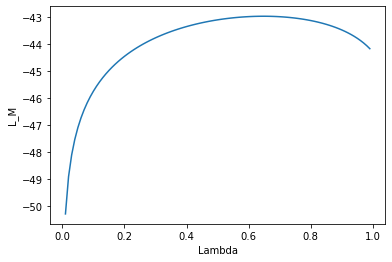

The lambda value maximize P_M is 0.6500000000000004


In [103]:
#4.3 e
sentence = "The sixteen officials sold fire insurance"
sentence = sentence.upper()
s_lst = sentence.split(' ')
pu = []
for key in s_lst:
    pu.append(vocab_index_count_lookup[key][1]/T)

s_lst.insert(0, '<s>')
pb = []
for i in range(1, len(s_lst)):
    prev = s_lst[i-1]
    curr = s_lst[i]
    try:
        pb.append(vocab_count_bi[prev][curr]/count_w[prev])
    except:
        pb.append(0)
l = 0
l_step_val = 0.01
pm = []
lm = []
l_lst = []
while l <= 1:
    l_lst.append(l)
    m = math.prod([(l*u) + ((1-l)*b) for u, b in zip(pu, pb)])
    pm.append(m)
    lm.append(math.log(m)) if m!=0 else lm.append(None)
    l += l_step_val
        
import matplotlib.pyplot as plt
plt.plot(l_lst, lm)
plt.xlabel('Lambda')
plt.ylabel('L_M')
plt.show()
print(f'The lambda value maximize P_M is {l_lst[pm.index(max(pm))]}')

In [121]:
#4.4a
import numpy as np
data_00 = []
data_01 = []

f = open('hw4files/nasdaq00.txt','r')
for line in f:
    data_00.append(float(line.strip()))       
f.close()

                     
f = open('hw4files/nasdaq01.txt','r')
for line in f:
    data_01.append(float(line.strip()))       
f.close()

x = np.array([[data_00[i], data_00[i+1],data_00[i+2]] for i in range(0, len(data_00)-3)])
y = np.array(data_00[3:])

from numpy.linalg import inv
X_dot_X_T = np.dot(x.T,x)
X_T_dot_Y = np.dot(x.T,y)
alphas = np.dot(inv(X_dot_X_T),X_T_dot_Y )
print(alphas)


[0.03189569 0.01560133 0.95067337]


In [125]:
#4.4b
x_test = np.array([[data_01[i], data_01[i+1],data_01[i+2]] for i in range(0, len(data_01)-3)])
y_test = np.array(data_01[3:])


rmse_00 = np.sqrt(np.square(np.subtract(y,np.dot(x,alphas))).mean())
print(rmse_00)

rmse_01 = np.sqrt(np.square(np.subtract(y_test,np.dot(x_test,alphas))).mean())
print(rmse_01)

117.9084436177829
54.63604967520658
